# Personal Loan Campaign

## Background

AllLife bank is hoping to expand their pool of asset customers, or those customers that borrow.  To do this, they are planning on targeting their existing depositor customers.  Their main goal is to convert these liability customers to personal loan customers, and they requested me to develop a model for them.  A campaign that they recently ran showed a conversion of 9%.  Their goal is to increase this percentage of conversion.

## Key Question to Answer

Will the customer buy the personal loan or not? What variables play the biggest role? What segment of customers shall we target further?


## Dataset
#### The lines below give a brief definition of each variable in the dataset:

ID: Customer ID

Age: Customer’s age in completed years.

Experience: #years of professional experience.

Income: Annual income of the customer (in thousand dollars).

ZIP Code: Home Address ZIP code.

Family: the Family size of the customer.

CCAvg: Average spending on credit cards per month (in thousand dollars)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.

Mortgage: Value of house mortgage if any. (in thousand dollars).

Personal_Loan: Did this customer accept the personal loan offered in the last campaign?

Securities_Account: Does the customer have securities account with the bank?

CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 

Online: Do customers use internet banking facilities?

CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
# To help make our code look less cluttered, this removes the warnings that pop up.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the packages for this project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False)

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model prediction modeling
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

In [3]:
# Reading our dataset titled "used_cars_data.csv".
file=pd.read_csv("Loan_Modelling.csv")

# Making a copy of the dataset, so I am not making any changes to the original file.
data=file.copy()

In [4]:
# Viewing the first 5 rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Viewing the last 5 rows of the dataset
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
# Looking at the shape of the dataset
data.shape

(5000, 14)

#### Observations
There are 5000 rows and 14 columns in the sample.

In [7]:
# Let's drop the ID column, as it is just an index column
data.drop(['ID'], axis = 1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [9]:
# Let's get an understanding on missing values in our dataset
data.isnull().sum().sort_values(ascending=False)

CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
dtype: int64

#### Observations
There are NOT any NaN values in the sample

In [10]:
# Changing data types
data["ZIPCode"]=data["ZIPCode"].astype("category")
data["Family"]=data["Family"].astype("category")
data["Personal_Loan"]=data["Personal_Loan"].astype("bool")
data["Securities_Account"]=data["Securities_Account"].astype("bool")
data["CD_Account"]=data["CD_Account"].astype("bool")
data["Online"]=data["Online"].astype("bool")
data["CreditCard"]=data["CreditCard"].astype("bool")
data["Education"]=data["Education"].astype("category")

In [11]:
# Multiplying by 1000 for the value
data["Income"]=data["Income"]*1000

In [12]:
# Multiplying by 1000 for the value
data["Mortgage"]=data["Mortgage"]*1000

In [13]:
# Multiplying by 1000 for the value
data["CCAvg"]=data["CCAvg"]*1000

In [14]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49000,91107,4,1600.0,1,0,False,True,False,False,False
1,45,19,34000,90089,3,1500.0,1,0,False,True,False,False,False
2,39,15,11000,94720,1,1000.0,1,0,False,False,False,False,False
3,35,9,100000,94112,1,2700.0,2,0,False,False,False,False,False
4,35,8,45000,91330,4,1000.0,2,0,False,False,False,False,True


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   bool    
 9   Securities_Account  5000 non-null   bool    
 10  CD_Account          5000 non-null   bool    
 11  Online              5000 non-null   bool    
 12  CreditCard          5000 non-null   bool    
dtypes: bool(5), category(3), float64(1), int64(4)
memory usage: 263.3 KB


## EDA

In [16]:
# Checking the correlation of variables
data.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.010353,0.169738,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.013898,0.014206,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,0.008967,-0.002385,-0.006689,-0.007231,0.002802,-0.015028,0.278644,0.004210,1.000000


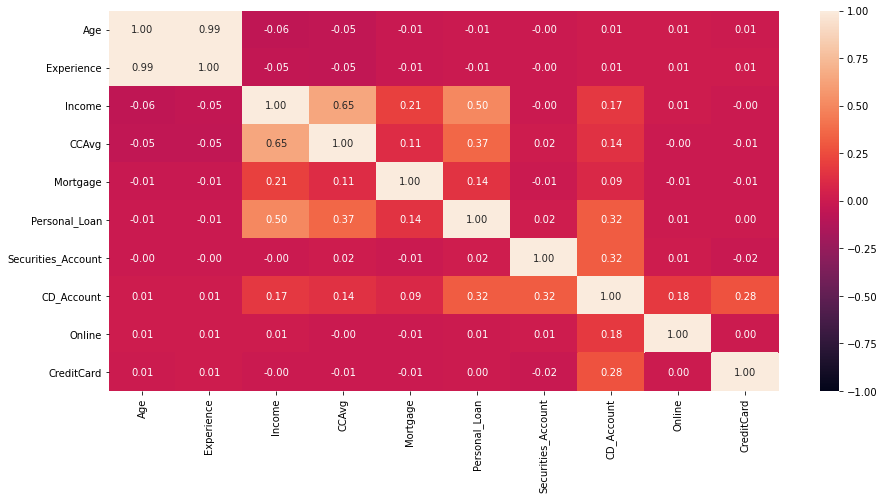

In [17]:
# Heatmap of variable correlation
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

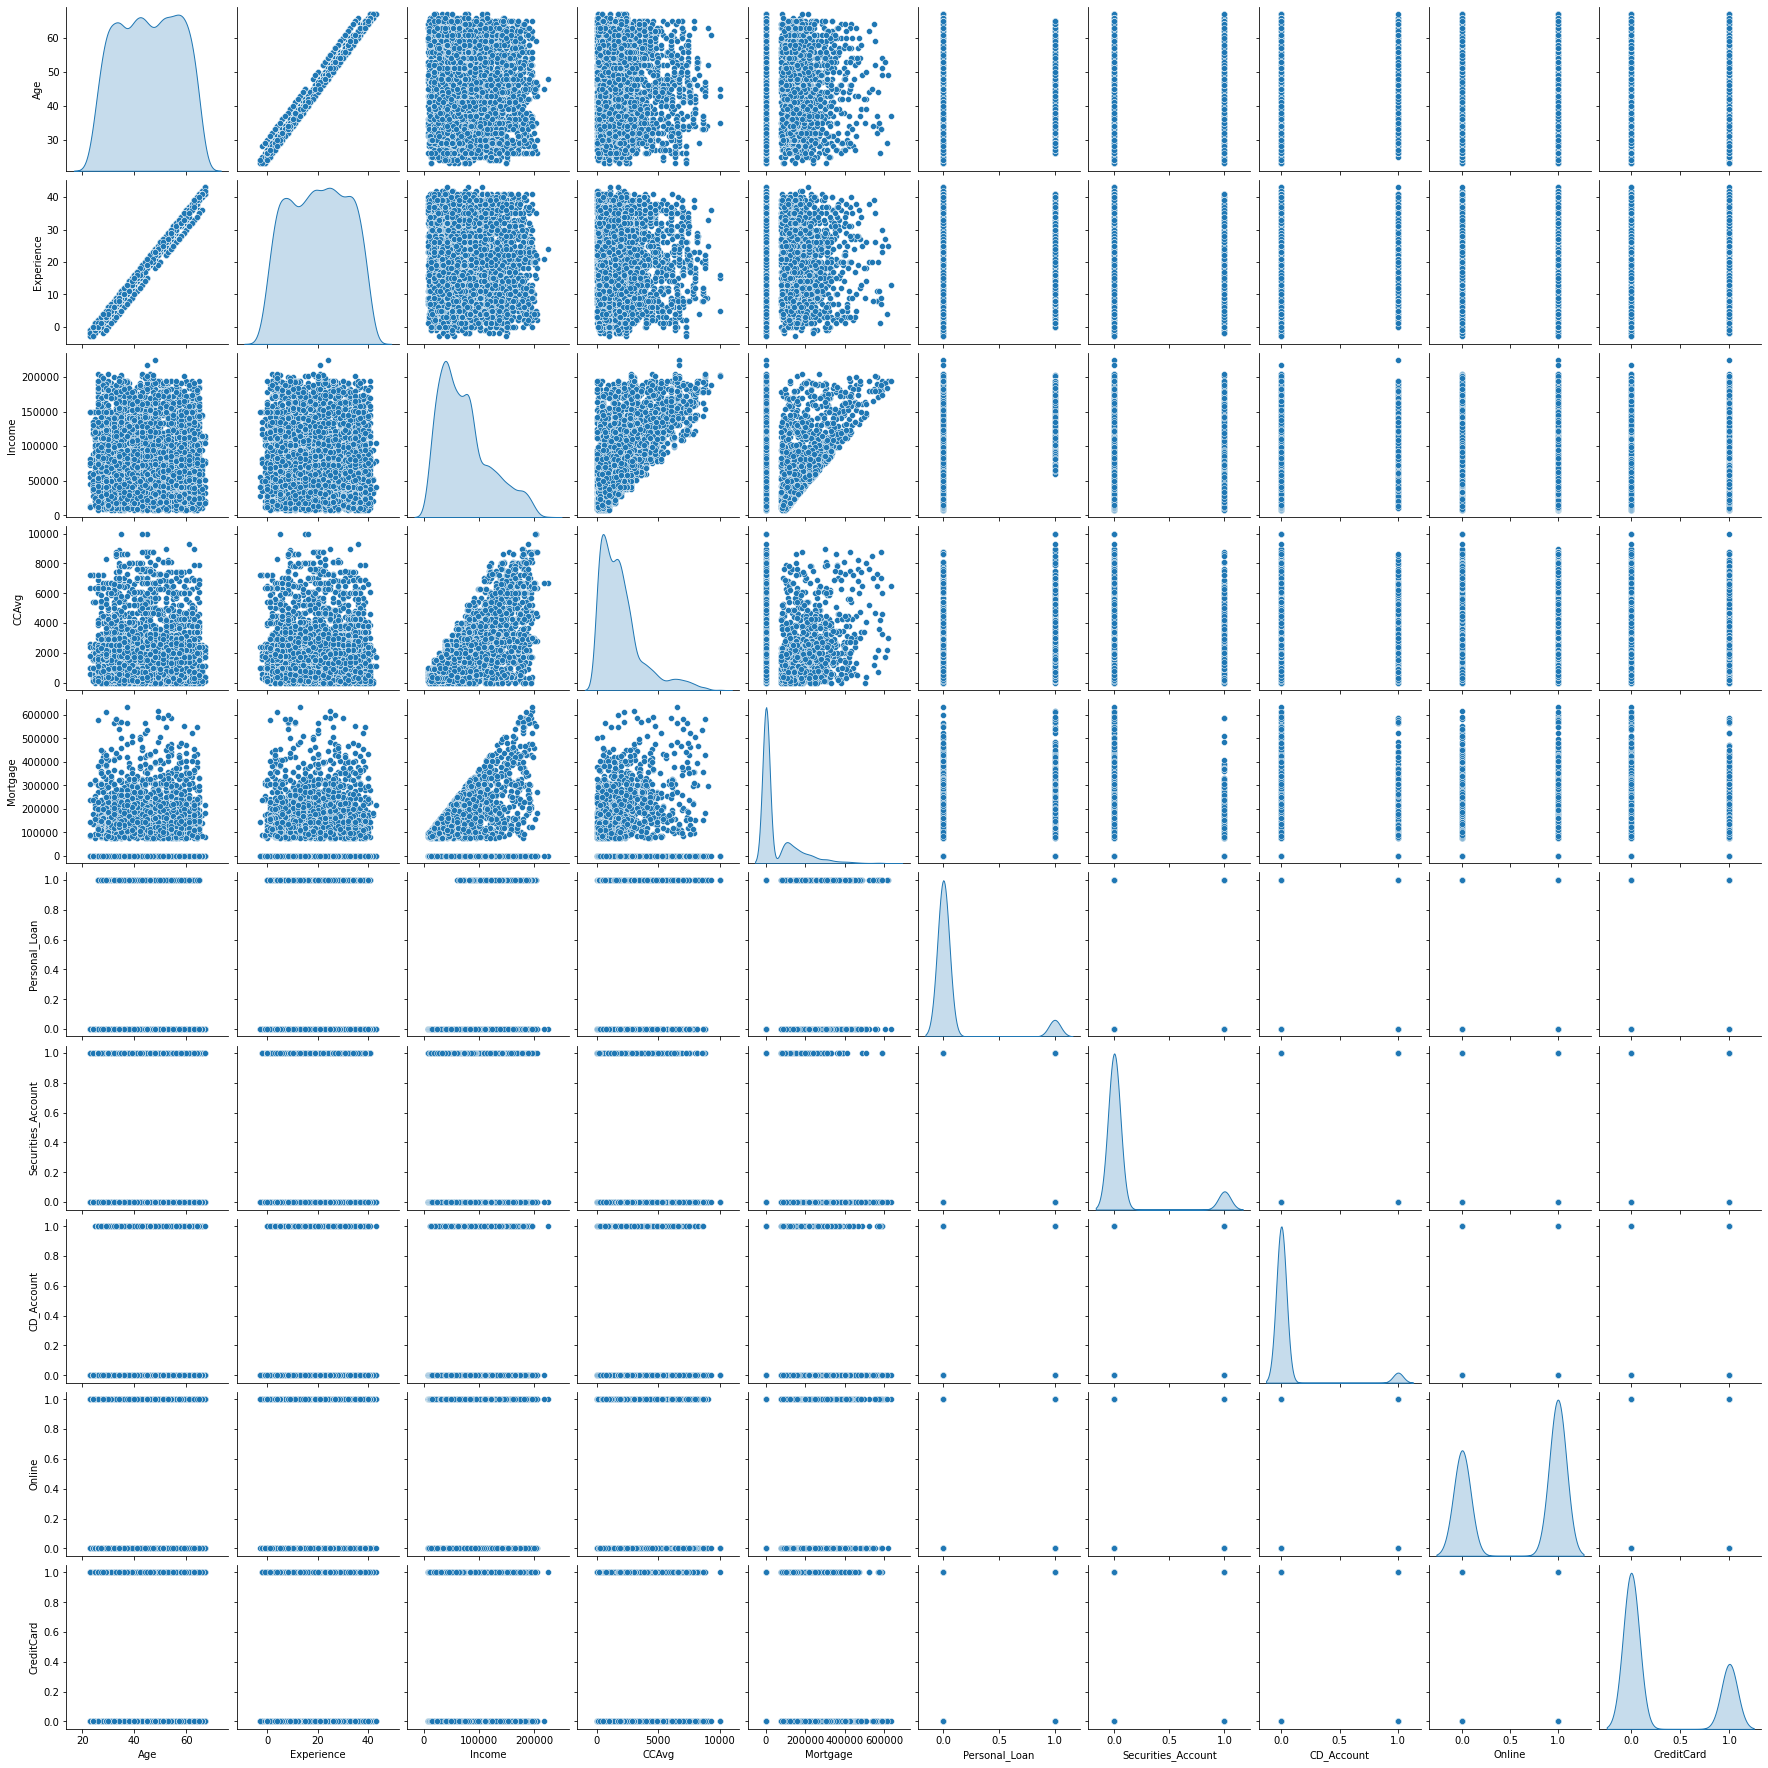

In [18]:
# Another visualization of correlation, a pairplot
sns.pairplot(data,diag_kind='kde')

#### Observations
After performing correlation visualization.  I see that there is:

Positive correlation with Experience and Age.

Positive correlation with Income and Mortgage.

Positive correlation with CCAvg and Income.

In [19]:
# Giving us some basic numbers in regards to our dataset. ".T" is to transpose the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73774.2000,46033.729321,8000.0,39000.0,64000.0,98000.0,224000.0
CCAvg,5000.0,1937.9380,1747.658980,0.0,700.0,1500.0,2500.0,10000.0
Mortgage,5000.0,56498.8000,101713.802102,0.0,0.0,0.0,101000.0,635000.0


#### Observations
I see that there is atleast 1 negative value for experience.  This is incorrect.  I need to remove these.

In [20]:
data.shape

(5000, 13)

In [21]:
# Let's convert mortage to a boolean variable.
data[data["Mortgage"] > 0] == 1

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
5,False,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,True,False
16,False,False,False,False,False,False,False,False,True,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,False,True,False
22,False,False,False,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,False,False,False,False,False,False,False,False,False,False,False,True,False
4988,False,False,False,False,True,False,True,False,False,False,False,False,True
4990,False,False,False,False,False,False,False,False,False,False,False,False,True
4991,False,False,False,False,True,False,False,False,False,False,False,False,True


In [22]:
data["Mortgage"]=data["Mortgage"].astype("bool")

#### Observations
Now Mortgage is a boolean variable.  Anytime there was a value in mortgage, it is now 1, or true

In [23]:
# Removing the negative experiences, these are errors
NegativeExperience = data[data['Experience'] < 0 ].index

In [24]:
data.drop(NegativeExperience, inplace = True)

In [25]:
data.shape

(4948, 13)

#### Observations
There were 52 negative entries for Experience.  I can see that those rows have been dropped.

In [26]:
# ZIPCode modification.  Let's change it so they're counties, this will make our job easier. There's a lot of zipcodes.
search = SearchEngine()
data["County"] = data["ZIPCode"].map(lambda x: search.by_zipcode(x).county)
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49000,91107,4,1600.0,1,False,False,True,False,False,False,Los Angeles County
1,45,19,34000,90089,3,1500.0,1,False,False,True,False,False,False,Los Angeles County
2,39,15,11000,94720,1,1000.0,1,False,False,False,False,False,False,Alameda County
3,35,9,100000,94112,1,2700.0,2,False,False,False,False,False,False,San Francisco County
4,35,8,45000,91330,4,1000.0,2,False,False,False,False,False,True,Los Angeles County


In [27]:
# Anytime a county is present less than 40 times, it is classified as county_different.
data.County[data["County"].map(data["County"].value_counts()) <= 40] = "County_Different"

In [28]:
data['County'] = data['County'].replace(to_replace='None', value=np.nan).dropna()

In [29]:
data["County"]=data["County"].astype("category")

In [30]:
data.drop(['ZIPCode'], axis = 1, inplace=True)

## Univariate Analysis

In [31]:
# Defining a function to show percentage on bars for our countplots
def percent(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()          
        ax.annotate(percentage, (x, y), size = 12) 
    plt.show() 

# Defining a histogram function to show us outliers and boxplot, as well as median and mean vlines
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

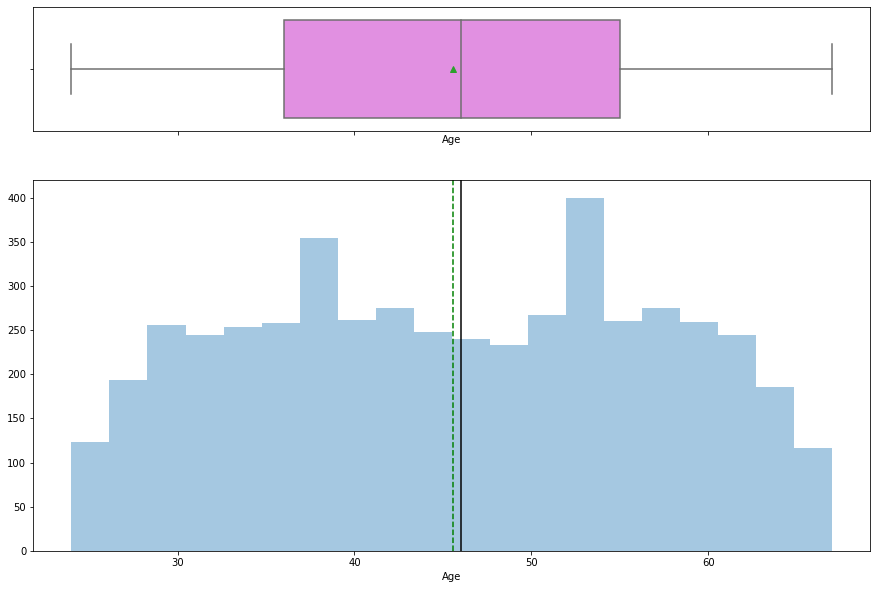

In [32]:
# Histogram showing Age
histogram_boxplot(data["Age"])

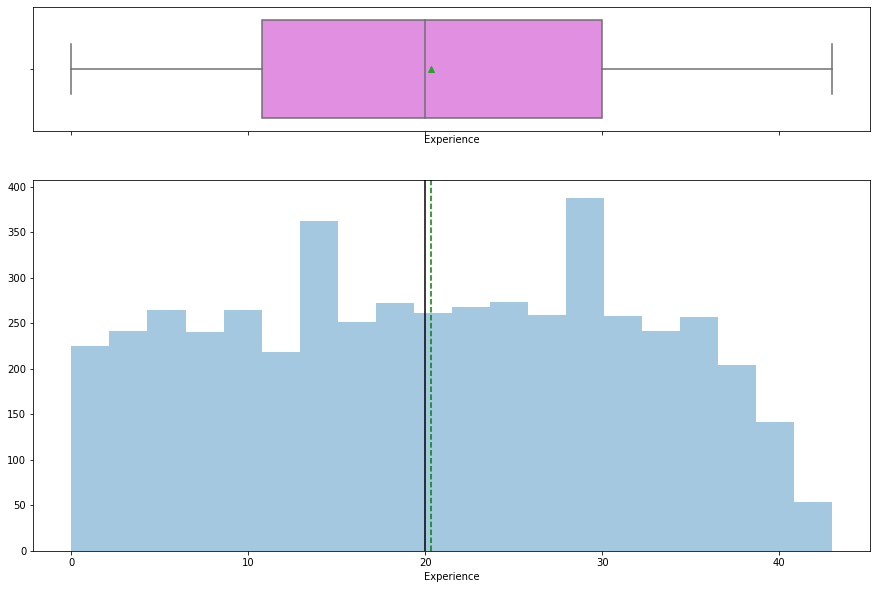

In [33]:
# Histogram showing Experience
histogram_boxplot(data["Experience"])

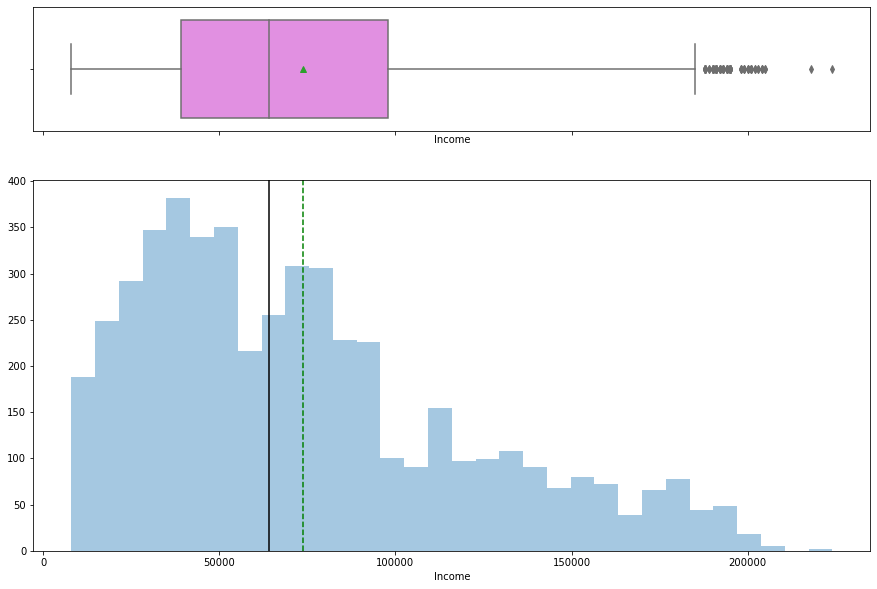

In [34]:
# Histogram showing Income
histogram_boxplot(data["Income"])

#### Observations
Considering that 0 is interpretted as not haveing a loan, I am going to drop it for a different visual. It will be dropped for visualization ONLY. Not in the actual data.

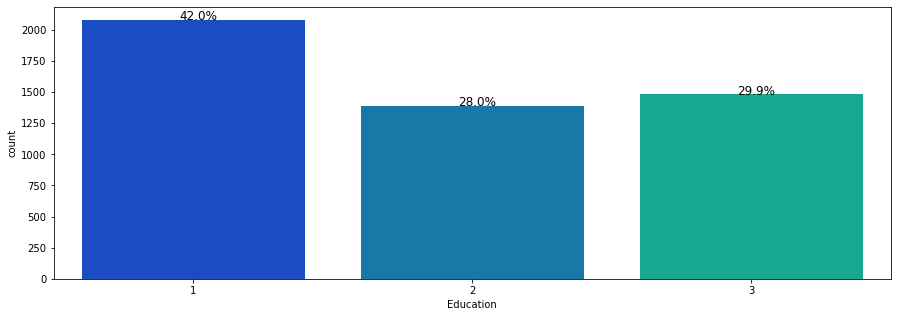

In [35]:
# Countplot of Education
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Education"],palette='winter')
percent(ax,data["Education"])

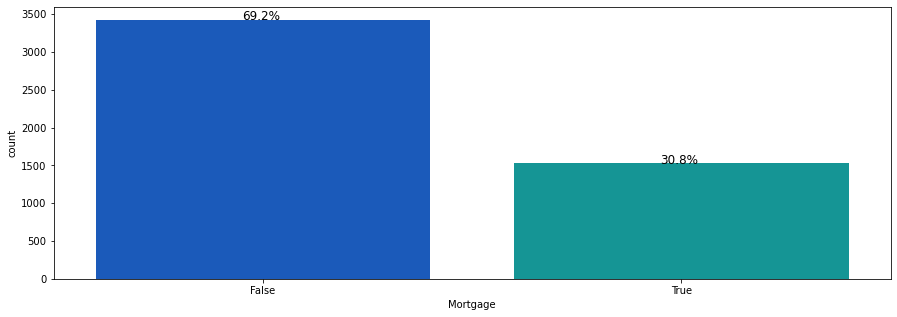

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Mortgage"],palette='winter')
percent(ax,data["Mortgage"])

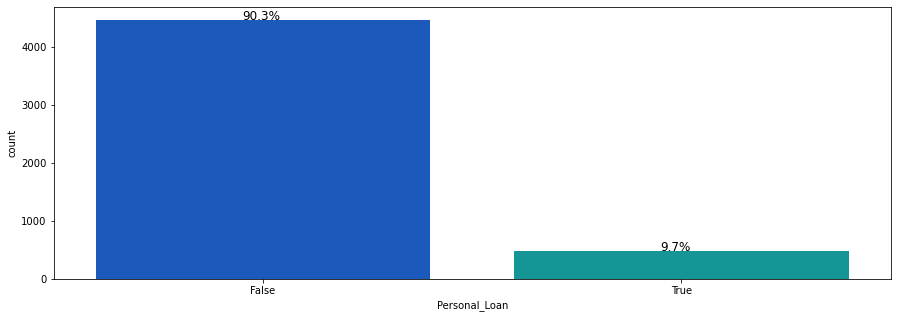

In [37]:
# Countplot of Personal Loan
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Personal_Loan"],palette='winter')
percent(ax,data["Personal_Loan"])

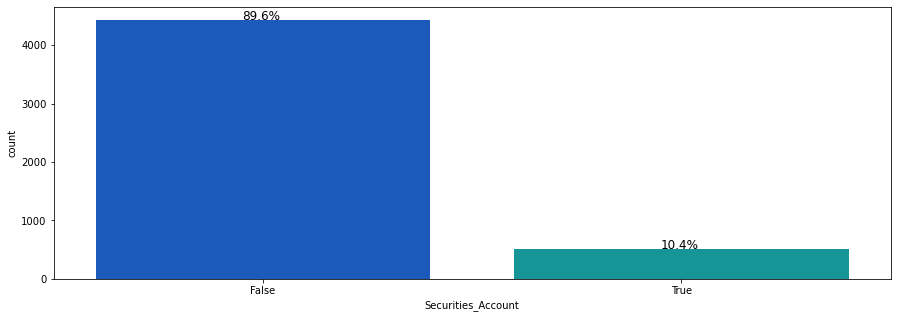

In [38]:
# Countplot of Securities Account
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Securities_Account"],palette='winter')
percent(ax,data["Securities_Account"])

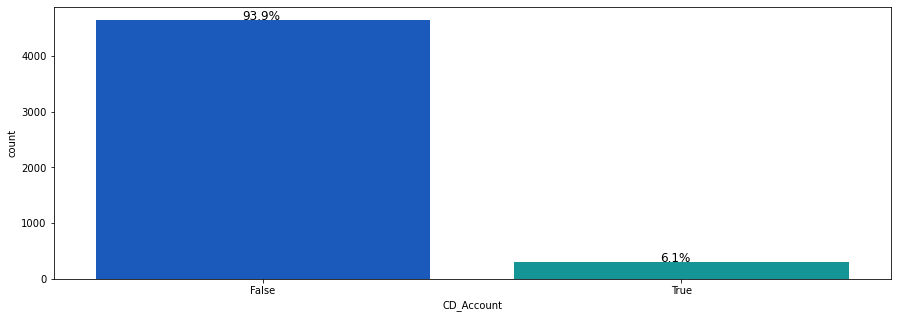

In [39]:
# Countplot of CD Account
plt.figure(figsize=(15,5))
ax = sns.countplot(data["CD_Account"],palette='winter')
percent(ax,data["CD_Account"])

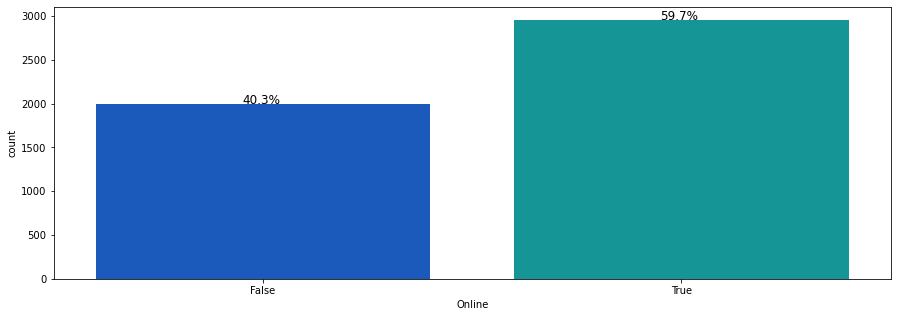

In [40]:
# Countplot of Online
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Online"],palette='winter')
percent(ax,data["Online"])

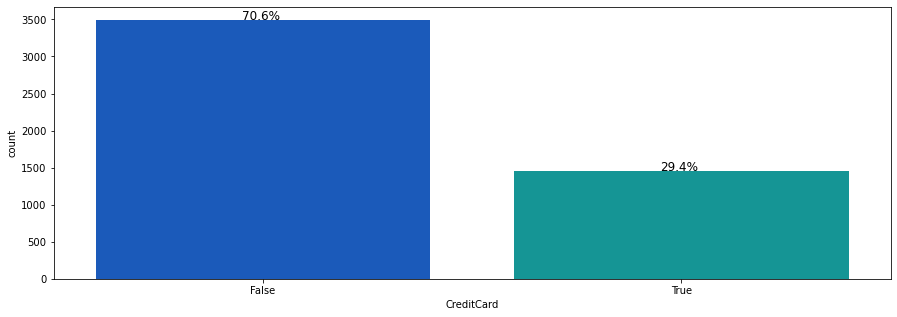

In [41]:
# Countplot of Credit Card
plt.figure(figsize=(15,5))
ax = sns.countplot(data["CreditCard"],palette='winter')
percent(ax,data["CreditCard"])

## Multivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Education'>

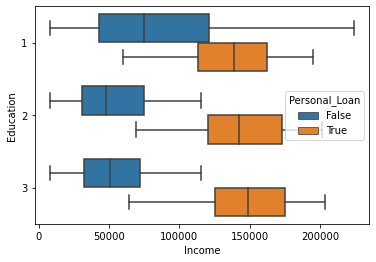

In [42]:
# Boxplot of Income, Education, and Personal Loan
sns.boxplot(x='Income', y='Education', hue='Personal_Loan', data = data)

#### Observations
I see that income and education are related.  Higher income is affected by education

<AxesSubplot:xlabel='Income', ylabel='CCAvg'>

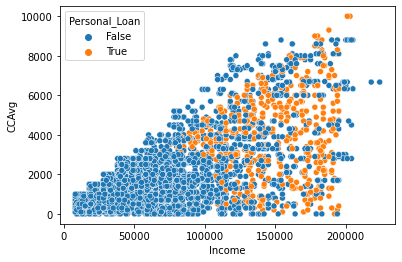

In [43]:
# Boxplot of CCAvg, Education, and Personal Loan
sns.scatterplot(x='Income', y='CCAvg', hue='Personal_Loan', data = data)

#### Observations
Those who have the personal loan, tend to have higher credit scores.

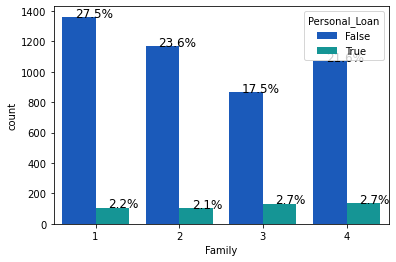

In [44]:
ax = sns.countplot(data["Family"], hue=data["Personal_Loan"], palette="winter")
percent(ax,data["Family"])

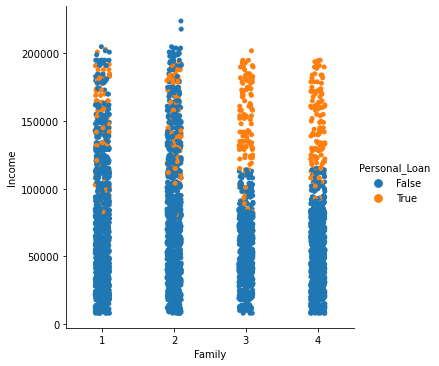

In [45]:
# Boxplot of Family, Income, and Personal Loan
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = data, kind='strip')

#### Observations
I see that if a family has 3 or 4 members, and makes over 98,500, they will take the personal loan!

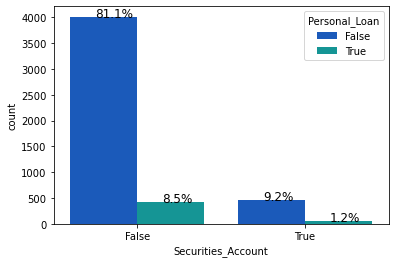

In [46]:
ax = sns.countplot(data["Securities_Account"], hue=data["Personal_Loan"], palette="winter")
percent(ax,data["Securities_Account"])

#### Observations
Those with security accounts are likely to take a loan 

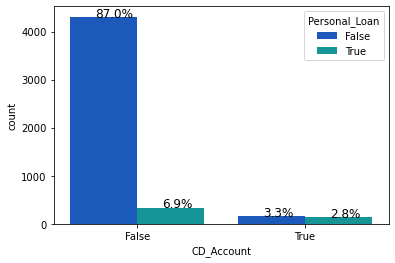

In [47]:
ax = sns.countplot(data["CD_Account"], hue=data["Personal_Loan"], palette="winter")
percent(ax,data["CD_Account"])

#### Observations
I see that almost all of CD accounts have the personal loan

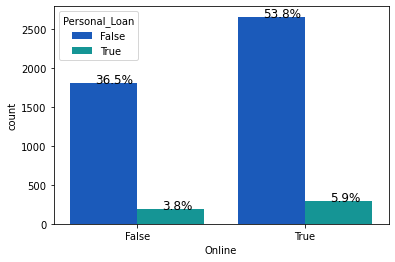

In [48]:
ax = sns.countplot(data["Online"], hue=data["Personal_Loan"], palette="winter")
percent(ax,data["Online"])

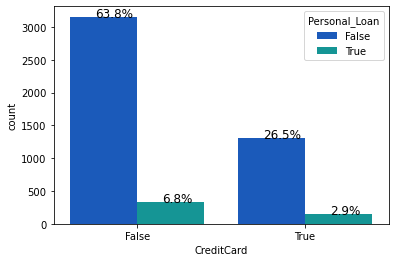

In [49]:
ax = sns.countplot(data["CreditCard"], hue=data["Personal_Loan"], palette="winter")
percent(ax,data["CreditCard"])

In [50]:
# Creating dummy variables
dummy = pd.get_dummies(
    data,
    columns=["County","Mortgage", "Family", "Education", "Securities_Account", "CD_Account", "Online", "CreditCard"], drop_first=True,
)

# Adding constant
dummy = sm.add_constant(dummy)

dummy.head()

,const,Age,Experience,Income,CCAvg,Personal_Loan,County_Contra Costa County,County_County_Different,County_Kern County,County_Los Angeles County,County_Marin County,County_Monterey County,County_Orange County,County_Riverside County,County_Sacramento County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Ventura County,County_Yolo County,Mortgage_True,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_True,CD_Account_True,Online_True,CreditCard_True
0,1.0,25,1,49000,1600.0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1.0,45,19,34000,1500.0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1.0,39,15,11000,1000.0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,35,9,100000,2700.0,False,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,35,8,45000,1000.0,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [51]:
# As always, we are dropping our target variable
x = dummy.drop("Personal_Loan", axis=1)  
y = dummy["Personal_Loan"].astype("int64")  

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

x_train.head()

,const,Age,Experience,Income,CCAvg,County_Contra Costa County,County_County_Different,County_Kern County,County_Los Angeles County,County_Marin County,County_Monterey County,County_Orange County,County_Riverside County,County_Sacramento County,County_San Bernardino County,County_San Diego County,County_San Francisco County,County_San Mateo County,County_Santa Barbara County,County_Santa Clara County,County_Santa Cruz County,County_Ventura County,County_Yolo County,Mortgage_True,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_True,CD_Account_True,Online_True,CreditCard_True
4315,1.0,51,26,62000,1800.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
4214,1.0,46,22,89000,2700.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1070,1.0,36,9,40000,1000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3631,1.0,46,21,51000,1900.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1181,1.0,25,0,65000,200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [53]:
x_train.dtypes

const                           float64
Age                               int64
Experience                        int64
Income                            int64
CCAvg                           float64
County_Contra Costa County        uint8
County_County_Different           uint8
County_Kern County                uint8
County_Los Angeles County         uint8
County_Marin County               uint8
County_Monterey County            uint8
County_Orange County              uint8
County_Riverside County           uint8
County_Sacramento County          uint8
County_San Bernardino County      uint8
County_San Diego County           uint8
County_San Francisco County       uint8
County_San Mateo County           uint8
County_Santa Barbara County       uint8
County_Santa Clara County         uint8
County_Santa Cruz County          uint8
County_Ventura County             uint8
County_Yolo County                uint8
Mortgage_True                     uint8
Family_2                          uint8


In [54]:
x.shape

(4948, 33)

In [55]:
# Printing our Logit Summary
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(
    disp=False
)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3430
Method:                           MLE   Df Model:                           32
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6418
Time:                        19:28:16   Log-Likelihood:                -396.66
converged:                       True   LL-Null:                       -1107.4
Covariance Type:            nonrobust   LLR p-value:                9.802e-279
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -12.1109      2.262     -5.355      0.000     -16.544      -7.678
Age                             -0.0310      0.084     -0.368      0.713     

In [56]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on training data
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

# Prediction for test data
y_predict = model.predict(x_test)


coef_data = pd.DataFrame(model.coef_)
coef_data['intercept'] = model.intercept_
print(coef_data)

          0         1         2         3         4         5        6  \
0 -0.012433 -0.168174  0.132556  0.000027  0.000051  0.000061 -0.00099   

          7         8         9        10        11        12        13  \
0  0.000126 -0.001888 -0.000115 -0.000174 -0.001571  0.000146 -0.000634   

         14       15        16       17       18        19        20  \
0 -0.001163 -0.00081 -0.000734 -0.00095 -0.00083 -0.000348 -0.000207   

         21        22        23        24        25        26       27  \
0 -0.000094 -0.000373 -0.002424 -0.008423  0.003581  0.001633  0.00423   

         28        29        30        31        32  intercept  
0  0.006028 -0.000205  0.008047 -0.006576 -0.003755  -0.012433  


In [57]:
# Printing our model score
model_score = model.score(x_test, y_test)
print(model_score)

0.9084175084175085


In [58]:
# Function for confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [59]:
#  Calculating recall score function
def get_recall_score(model, predictors, target):
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [60]:
# Decision tree model
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [61]:
# Fitting our model
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

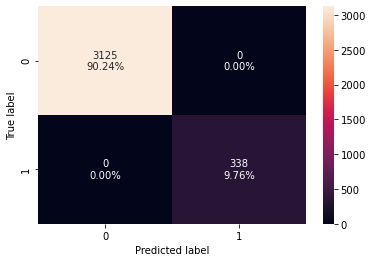

In [62]:
# Displaying confusion matrix for training data
confusion_matrix_sklearn(model, x_train, y_train)

In [63]:
decision_tree_perf_train = get_recall_score(model, x_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


#### Observation
Model has 0 Type I and Type II errors.  This is great!

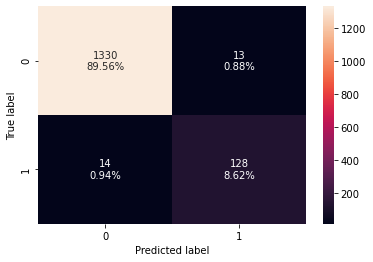

In [64]:
# Displaying confusion matrix for test data
confusion_matrix_sklearn(model, x_test, y_test)

In [65]:
decision_tree_perf_test = get_recall_score(model, x_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.9014084507042254


#### Observation
Our model appears to be overfitting due to test set having both Type I and Type II errors.  Although, there is not too many errors fortunately.

## Decision Tree

In [66]:
# Creating our decision tree columns
feature_names = x_train.columns.to_list()

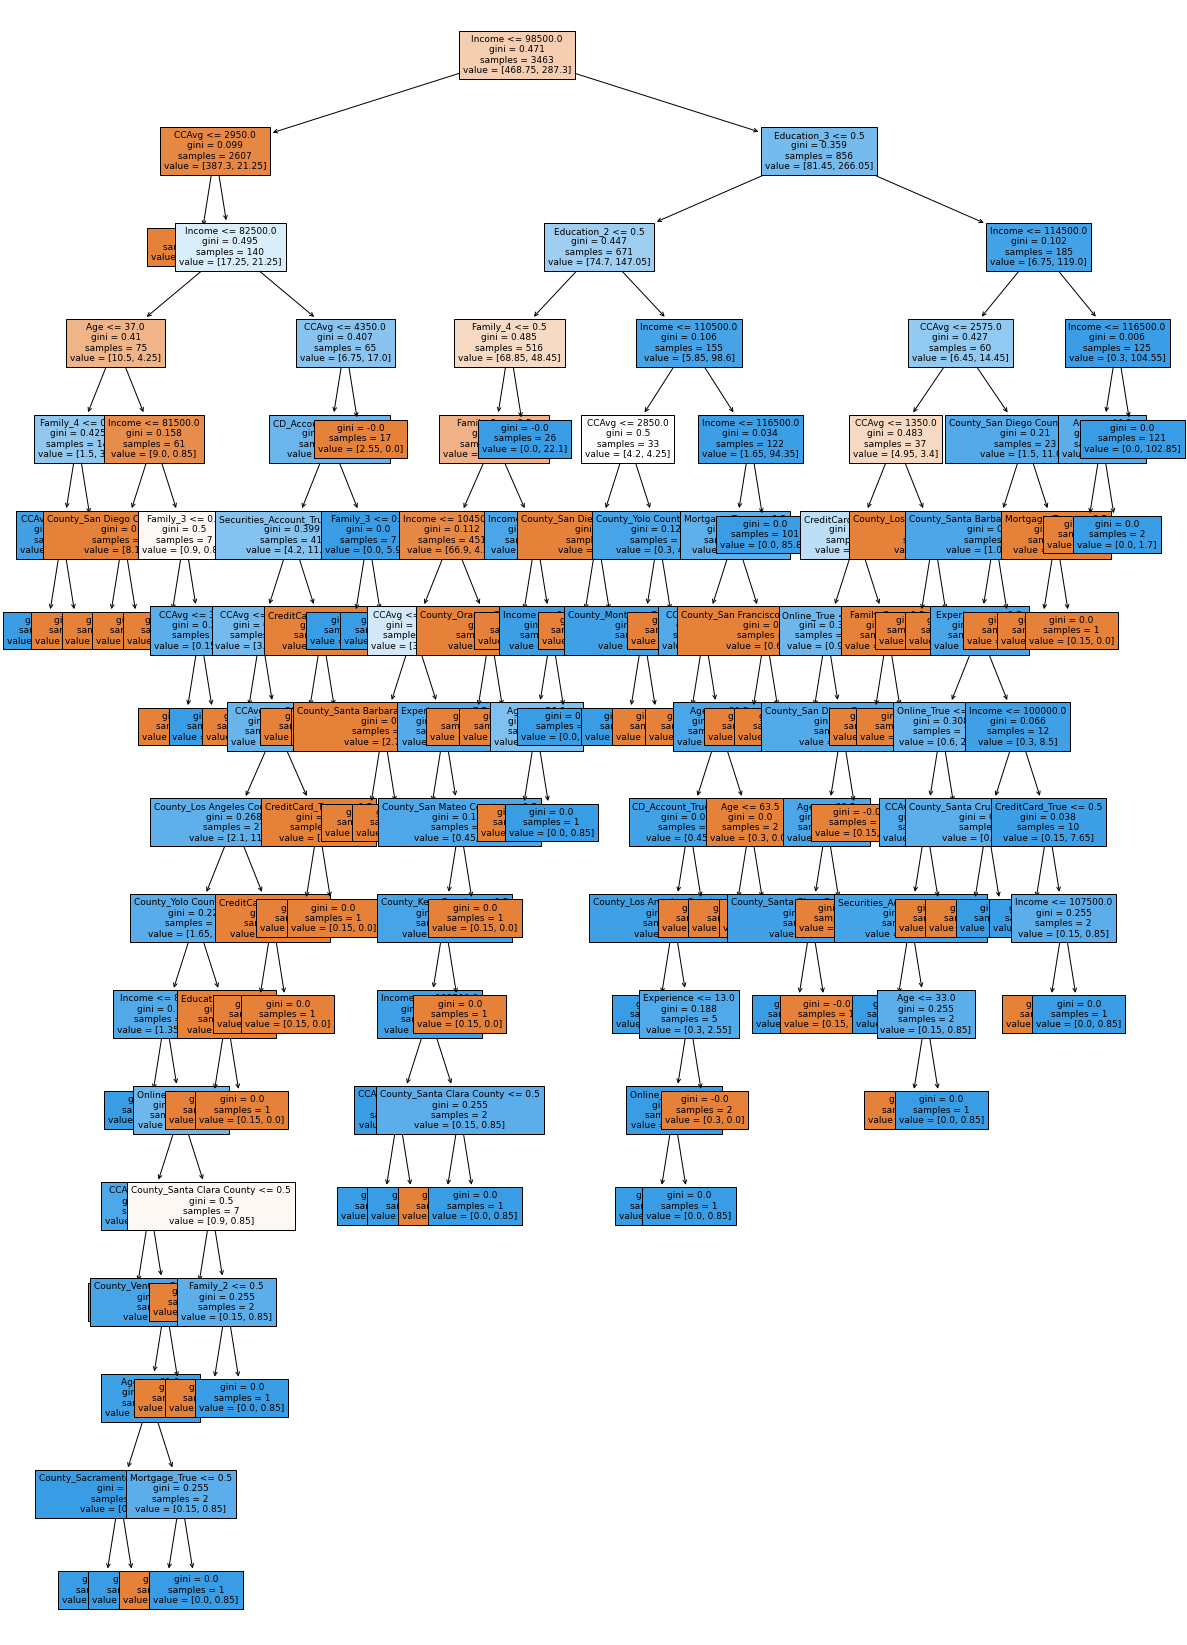

In [67]:
# Plotting our decision tree!
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [68]:
# Displaying our decision tree in text
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98500.00
|   |--- CCAvg <= 2950.00
|   |   |--- weights: [370.05, 0.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- Income <= 82500.00
|   |   |   |--- Age <= 37.00
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3500.00
|   |   |   |   |   |   |--- weights: [0.00, 3.40] class: 1
|   |   |   |   |   |--- CCAvg >  3500.00
|   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |--- Age >  37.00
|   |   |   |   |--- Income <= 81500.00
|   |   |   |   |   |--- County_San Diego County <= 0.50
|   |   |   |   |   |   |--- weights: [7.05, 0.00] class: 0
|   |   |   |   |   |--- County_San Diego County >  0.50
|   |   |   |   |   |   |--- weights: [1.05, 0.00] class: 0
|   |   |   |   |--- Income >  81500.00
|   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |   |   |   |   |--- Family_3 

#### Observations
Income at 98,000 thousand is incredibly important according to the decision tree

CCAvg indicates if someone is likely to take out a personal loan

Higher education also indicates taking out a personal loan

In [69]:
# Let's determine what variables are MOST impactful at predicting Personal Loan
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
Income                        5.913306e-01
CCAvg                         1.043226e-01
Education_2                   8.744235e-02
Family_3                      7.622886e-02
Family_4                      5.770367e-02
Education_3                   3.612766e-02
Age                           1.248227e-02
Online_True                   4.238035e-03
CreditCard_True               3.716309e-03
County_Santa Clara County     3.260647e-03
Mortgage_True                 3.226478e-03
Securities_Account_True       2.898687e-03
County_San Diego County       2.714712e-03
CD_Account_True               2.595064e-03
Experience                    2.492679e-03
County_Yolo County            2.065616e-03
County_Los Angeles County     1.966929e-03
County_Monterey County        8.133943e-04
County_Kern County            7.597639e-04
County_Ventura County         7.597639e-04
County_Santa Cruz County      7.157870e-04
Family_2                      7.157870e-04
County_San 

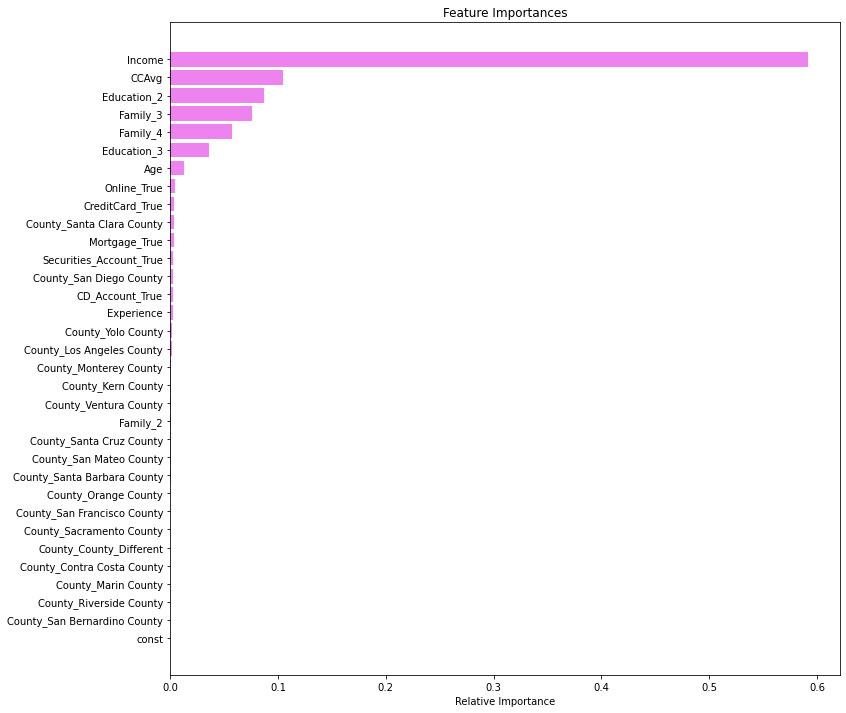

In [70]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
Income is by far the most important variable in our model when it comes to predicting Personal_Loan, followed by CCAvg.

In [71]:
# Let's try to get rid of overfitting, I do NOT want to capture noise in our model!!

estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1)

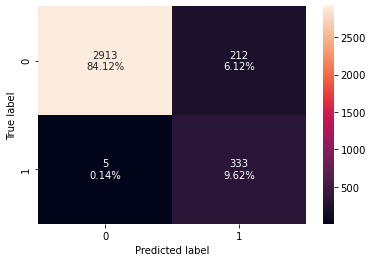

In [72]:
# Let's look at the training data
confusion_matrix_sklearn(estimator, x_train, y_train)

#### Observations
There are some Type I and Type II errors.

In [73]:
decision_tree_tune_perf_train = get_recall_score(estimator, x_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.985207100591716


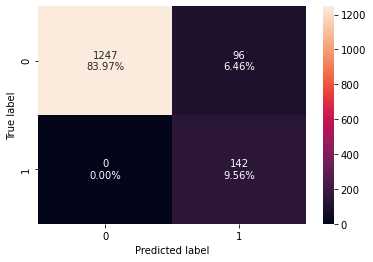

In [74]:
# Let's check the test data
confusion_matrix_sklearn(estimator, x_test, y_test)

In [75]:
decision_tree_tune_perf_test = get_recall_score(estimator, x_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 1.0


#### Observation
This matrix does not have any Type II, or False Negative errors.  This is fantastic!

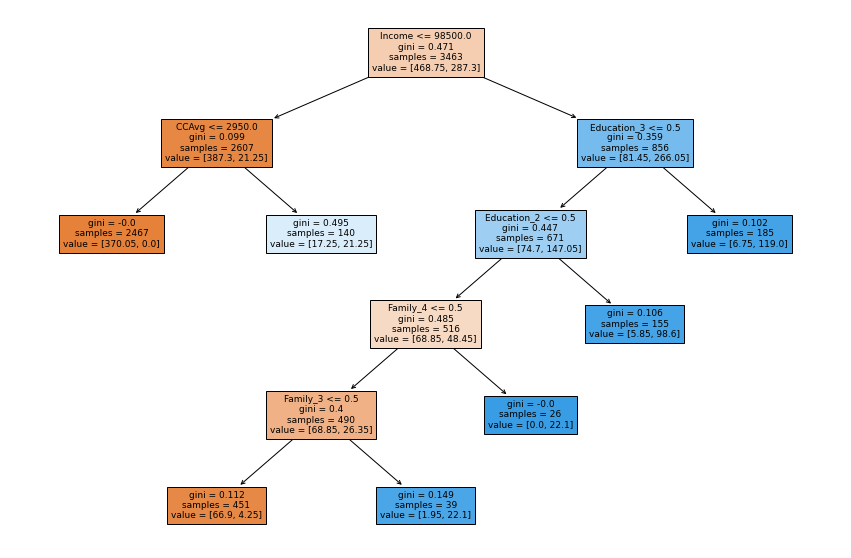

In [76]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [77]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98500.00
|   |--- CCAvg <= 2950.00
|   |   |--- weights: [370.05, 0.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- weights: [17.25, 21.25] class: 1
|--- Income >  98500.00
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- weights: [66.90, 4.25] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- weights: [1.95, 22.10] class: 1
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- weights: [0.00, 22.10] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [5.85, 98.60] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [6.75, 119.00] class: 1



In [78]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                   Imp
Income                        0.633650
Education_2                   0.103214
Family_3                      0.087926
CCAvg                         0.070399
Family_4                      0.062167
Education_3                   0.042644
Family_2                      0.000000
County_Santa Cruz County      0.000000
County_Ventura County         0.000000
County_Yolo County            0.000000
Mortgage_True                 0.000000
const                         0.000000
County_Santa Barbara County   0.000000
Securities_Account_True       0.000000
CD_Account_True               0.000000
Online_True                   0.000000
County_Santa Clara County     0.000000
County_San Francisco County   0.000000
County_San Mateo County       0.000000
Age                           0.000000
County_San Diego County       0.000000
County_San Bernardino County  0.000000
County_Sacramento County      0.000000
County_Riverside County       0.000000
County_Orange County     

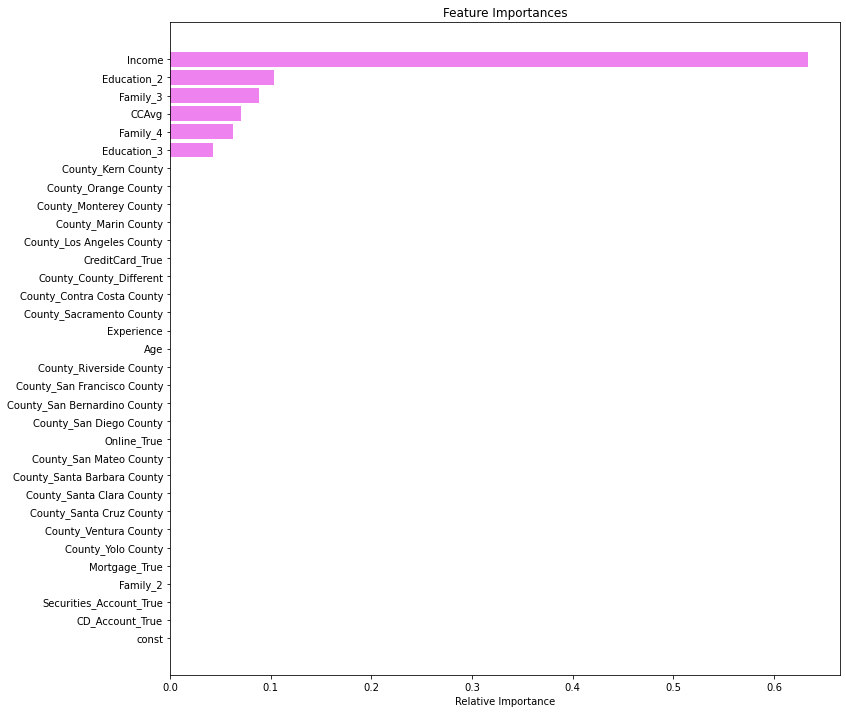

In [79]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
I see that Income, Family, Education, and CCAvg are influential on Personal Loan, in that order

In [80]:
# We want to be using the important alphas
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

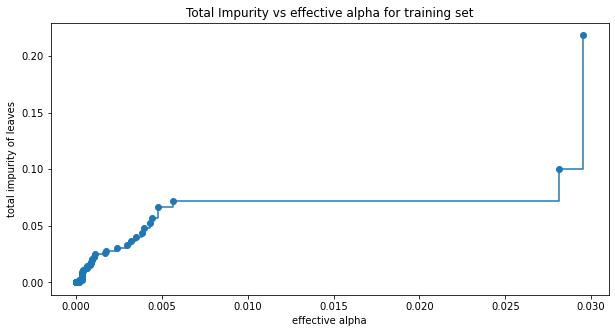

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [82]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2529511098898343


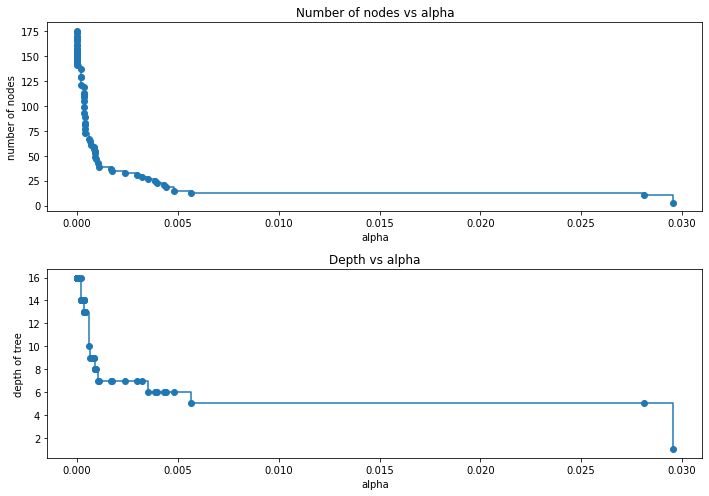

In [83]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [84]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [85]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [86]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

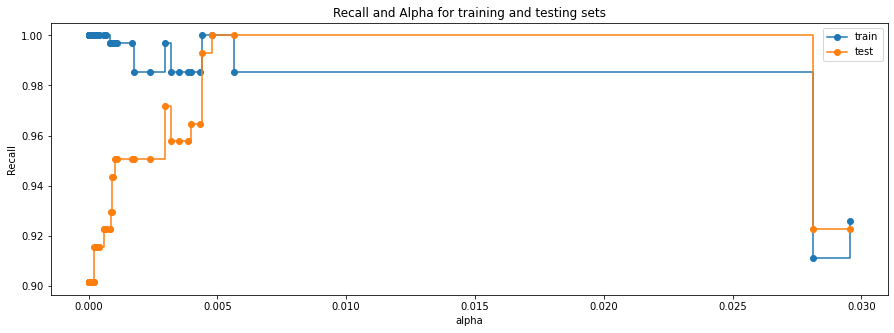

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall and Alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [88]:
# creating an improved recall model
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004788697557903667,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [89]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004788697557903667,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

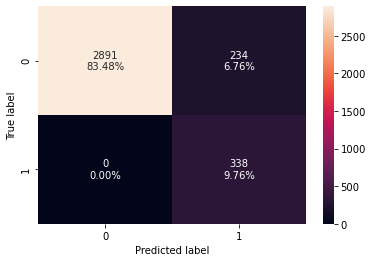

In [90]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [91]:
print("Recall Score:", get_recall_score(best_model, x_train, y_train))

Recall Score: 1.0


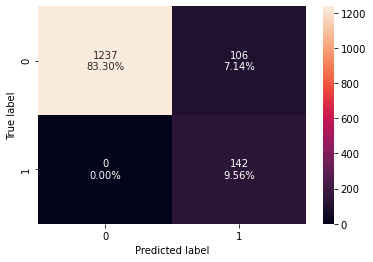

In [92]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [93]:
print("Recall Score:", get_recall_score(best_model, x_test, y_test))

Recall Score: 1.0


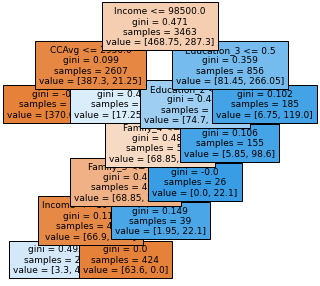

In [94]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [95]:
# I use 0.004 due to the recall and alpha visual above
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.004, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

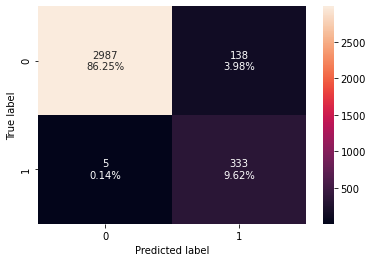

In [96]:
confusion_matrix_sklearn(best_model2, x_train, y_train)

In [97]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, x_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.985207100591716


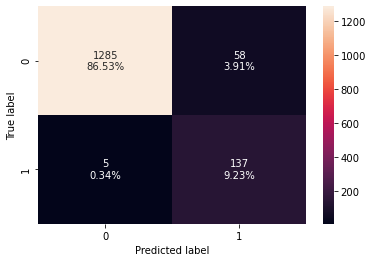

In [98]:
confusion_matrix_sklearn(best_model2, x_test, y_test)

In [99]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, x_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9647887323943662


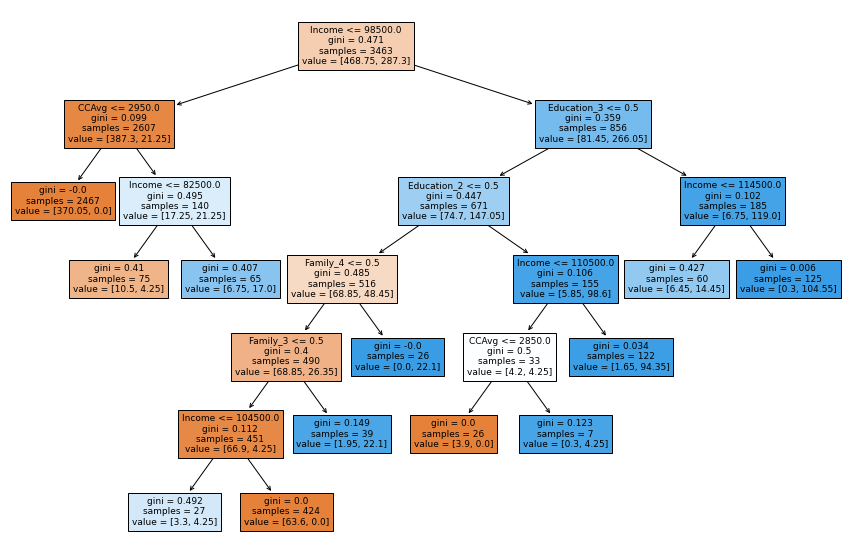

In [100]:
# Our post pruned decision tree
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [101]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98500.00
|   |--- CCAvg <= 2950.00
|   |   |--- weights: [370.05, 0.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- Income <= 82500.00
|   |   |   |--- weights: [10.50, 4.25] class: 0
|   |   |--- Income >  82500.00
|   |   |   |--- weights: [6.75, 17.00] class: 1
|--- Income >  98500.00
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 104500.00
|   |   |   |   |   |   |--- weights: [3.30, 4.25] class: 1
|   |   |   |   |   |--- Income >  104500.00
|   |   |   |   |   |   |--- weights: [63.60, 0.00] class: 0
|   |   |   |   |--- Family_3 >  0.50
|   |   |   |   |   |--- weights: [1.95, 22.10] class: 1
|   |   |   |--- Family_4 >  0.50
|   |   |   |   |--- weights: [0.00, 22.10] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- Income <= 110500.00
|   |   |   |   |--- CCAvg <= 2850.00
|   |   |   |   |   |--- weights: [3.90, 0.00] class: 0
|

In [102]:
print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Income                        0.642928
Education_2                   0.097373
Family_3                      0.082951
CCAvg                         0.077869
Family_4                      0.058649
Education_3                   0.040231
Family_2                      0.000000
County_Santa Cruz County      0.000000
County_Ventura County         0.000000
County_Yolo County            0.000000
Mortgage_True                 0.000000
const                         0.000000
County_Santa Barbara County   0.000000
Securities_Account_True       0.000000
CD_Account_True               0.000000
Online_True                   0.000000
County_Santa Clara County     0.000000
County_San Francisco County   0.000000
County_San Mateo County       0.000000
Age                           0.000000
County_San Diego County       0.000000
County_San Bernardino County  0.000000
County_Sacramento County      0.000000
County_Riverside County       0.000000
County_Orange County     

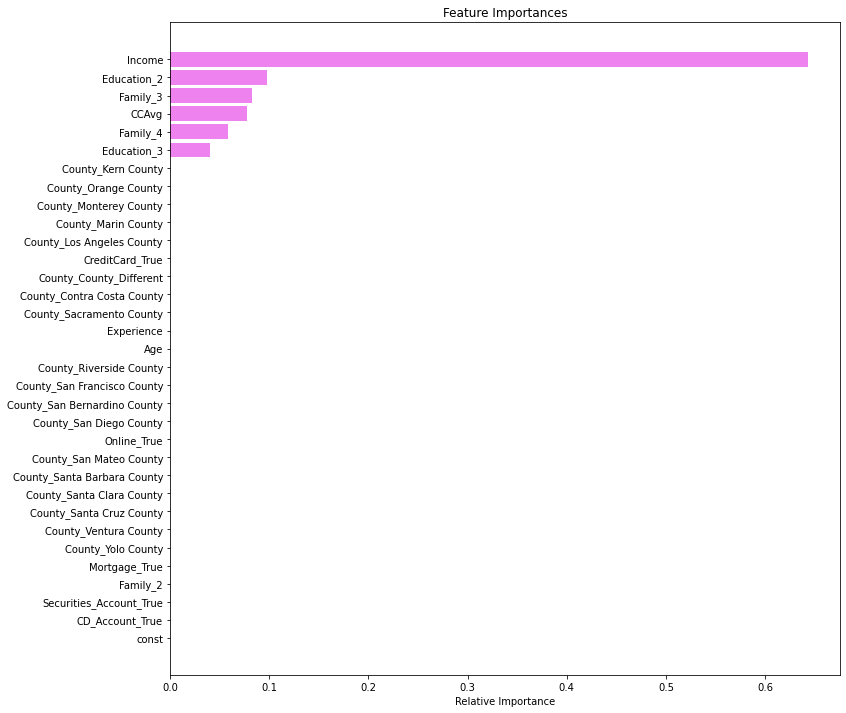

In [103]:
# Let's see which variables make an impact on Personal_Loan
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [104]:
# training performance 
models_train_comp_data = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_data

Training performance comparison:


,Recall on training set
0,1.000000
1,0.985207
2,0.985207


In [105]:
# testing performance 
models_test_comp_data = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_data

Test performance comparison:


,Recall on testing set
0,0.901408
1,1.000000
2,0.964789


#### Observations
It looks like our best model in regards to recall is the post pruned model.  

In [106]:
# Lets get our current numbers for modeling
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(
    disp=False
)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3430
Method:                           MLE   Df Model:                           32
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6418
Time:                        19:28:27   Log-Likelihood:                -396.66
converged:                       True   LL-Null:                       -1107.4
Covariance Type:            nonrobust   LLR p-value:                9.802e-279
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -12.1109      2.262     -5.355      0.000     -16.544      -7.678
Age                             -0.0310      0.084     -0.368      0.713     

In [107]:
import statsmodels.api as sm

# Adding a constant to our data because statsmodels needs it done manually!
x_con = sm.add_constant(dummy)

x_trainc, x_testc, y_trainc, y_testc = train_test_split(
    x_con, y, test_size=0.30, random_state=1
)

In [108]:
# Let's display our VIF scores
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                           478.912576
Age                              94.691284
Experience                       94.469974
Income                            1.838581
CCAvg                             1.737862
County_Contra Costa County        1.156508
County_County_Different           1.467517
County_Kern County                1.096089
County_Los Angeles County         2.314108
County_Marin County               1.077820
County_Monterey County            1.200206
County_Orange County              1.506370
County_Riverside County           1.085586
County_Sacramento County          1.274883
County_San Bernardino County      1.166458
County_San Diego County           1.809660
County_San Francisco County       1.387560
County_San Mateo County           1.301236
County_Santa Barbara County       1.235531
County_Santa Clara County         1.799209
County_Santa Cruz County          1.106510
County_Ventura County             1.190600
County_Yolo County 

In [109]:
# I drop Experience to due its VIF value being the so high.
x_train1 = x_train.drop("Experience", axis=1)
vif_series1 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                           36.272916
Age                              1.017341
Income                           1.834390
CCAvg                            1.729444
County_Contra Costa County       1.156504
County_County_Different          1.467314
County_Kern County               1.095507
County_Los Angeles County        2.314085
County_Marin County              1.077687
County_Monterey County           1.200139
County_Orange County             1.506216
County_Riverside County          1.085577
County_Sacramento County         1.274861
County_San Bernardino County     1.165983
County_San Diego County          1.809658
County_San Francisco County      1.387544
County_San Mateo County          1.300883
County_Santa Barbara County      1.235494
County_Santa Clara County        1.799208
County_Santa Cruz County         1.106170
County_Ventura County            1.190466
County_Yolo County               1.184865
Mortgage_True                    1.008021
Family_2            

#### Observations
Aftering dropping experience, our VIF is good!

In [110]:
#Printing our final results!
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3463
Model:                          Logit   Df Residuals:                     3431
Method:                           MLE   Df Model:                           31
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6418
Time:                        19:28:28   Log-Likelihood:                -396.73
converged:                       True   LL-Null:                       -1107.4
Covariance Type:            nonrobust   LLR p-value:                1.536e-279
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -12.8916      0.837    -15.408      0.000     -14.531     -11.252
Age                           9.396e-06      0.008      0.001      0.999     

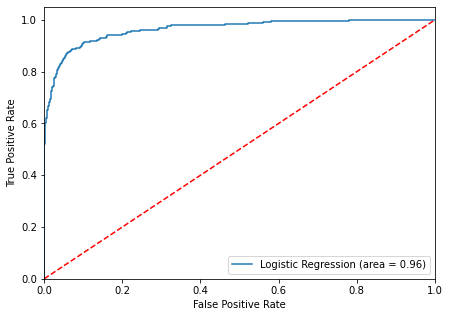

In [111]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#### Conclusions and Recommendations

I am going with the pre pruned model!  I tuned the model with GridSearch to eliminate some of the overfitting.  I obtained a high recall in the pre pruned model, and I are going with recall over precision due to the fact that I am looking for positives identified correctly.

I determined that Income is a huge factor in determing a personal loan.

Almost all CD Account holders have personal loans.  They can target new CD account holders, as they will also have the personal loans

I see higher CCAvg's equal higher chance of taking the personal loan

I see that if a family has 3 or 4 members, and makes over 98,500, they will take the personal loan!

Customers with Securities accounts are MORE likely to take the personal loan

If they are above the income level of 98,000 income level, the size of their family is also important.